In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
#Load the datasets
books = pd.read_csv("Books.csv",encoding = "latin-1",error_bad_lines=False)
users = pd.read_csv("Users.csv",error_bad_lines=False,encoding = "latin-1")
ratings = pd.read_csv("Ratings.csv",error_bad_lines=False,encoding = "latin-1")

In [3]:
print("Books Data:    ", books.shape)
print("Users Data:    ", users.shape)
print("Books-ratings: ", ratings.shape)

Books Data:     (271360, 8)
Users Data:     (278858, 3)
Books-ratings:  (1149780, 3)


## Preprocessing

# preprocessing on books dataset

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [5]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [6]:
# Drop URL columns
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [7]:
books.loc[books["Book-Author"].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [8]:
books.loc[books["Publisher"].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [9]:
books.at[187689 ,'Book-Author'] = 'Other'
books.at[128890 ,'Publisher'] = 'Other'
books.at[129037 ,'Publisher'] = 'Other'

In [10]:
# checking for unique values
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
books.loc[books["Year-Of-Publication"]=='DK Publishing Inc',: ]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [12]:
books.loc[books["Year-Of-Publication"]=='Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [13]:
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'

books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = 2003
books.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [14]:
## change the datatypes of year of publication 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [15]:
## again check for unique values of year of publication column
print(sorted(list(books['Year-Of-Publication'].unique())))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [16]:
# replace invalid years with 2002
books.loc[books['Year-Of-Publication'] > 2021, 'Year-Of-Publication'] = 2002
books.loc[books['Year-Of-Publication'] == 0, 'Year-Of-Publication'] = 2002

In [17]:
## Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

In [18]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


## Preprocessing on users datset

In [19]:
print("Columns: ", list(users.columns))
users.head()

Columns:  ['User-ID', 'Location', 'Age']


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [20]:
## Checking null values
print(users.isna().sum()) 

User-ID          0
Location         0
Age         110762
dtype: int64


In [21]:
## Check for all values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [22]:
required = users[users['Age'] <= 80]
required = users[users['Age'] >= 10]

In [23]:
mean = round(required['Age'].mean())   
mean

35

In [24]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [25]:
list_ = users.Location.str.split(', ')

city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  #removing invalid entries too
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',':   #removing invalid entries 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())
        
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    c = ent.split('/')            #handling cases where city/state entries from city list as state is already given 
    temp.append(c[0])

df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

print(count_no_country)   #printing the number of countries didnt have any values 
print(count_no_state)     #printing the states which didnt have any values

4659
16044


In [26]:
## Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   User-ID  278858 non-null  int64 
 1   Age      278858 non-null  int32 
 2   City     278858 non-null  object
 3   State    278858 non-null  object
 4   Country  278858 non-null  object
dtypes: int32(1), int64(1), object(3)
memory usage: 9.6+ MB


In [28]:
users.head()

,User-ID,Age,City,State,Country
0,1,35,nyc,new york,usa
1,2,18,stockton,california,usa
2,3,35,moscow,yukon territory,russia
3,4,17,porto,v.n.gaia,portugal
4,5,35,farnborough,hants,united kingdom


## Preprocessing on ratings dataset

In [29]:
print("Columns", list(ratings.columns))
ratings.head()

Columns ['User-ID', 'ISBN', 'Book-Rating']


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [30]:
## checking for null values
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [31]:
ratings.loc[ratings['Book-Rating'].isnull(),:]

,User-ID,ISBN,Book-Rating


In [32]:
ratings.at[544364,"Book-Rating"]= 0

In [33]:
ratings.dtypes

User-ID         int64
ISBN           object
Book-Rating     int64
dtype: object

In [34]:
import re
## checking ISBN
flag = 0
k =[]
reg = "[^A-Za-z0-9]"

for x in ratings['ISBN']:
    z = re.search(reg,x)    
    if z:
        flag = 1

if flag == 1:
    print("False")
else:
    print("True")

False


In [35]:
## removing extra characters from ISBN (from ratings dataset) existing in books dataset
bookISBN = books['ISBN'].tolist() 
reg = "[^A-Za-z0-9]" 
for index, row_Value in ratings.iterrows():
    z = re.search(reg, row_Value['ISBN'])    
    if z:
        f = re.sub(reg,"",row_Value['ISBN'])
        if f in bookISBN:
            ratings.at[index , 'ISBN'] = f

In [36]:
## Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

In [37]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149776 entries, 0 to 1149775
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149776 non-null  int64 
 1   ISBN         1149776 non-null  object
 2   Book-Rating  1149776 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [38]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Merging all three datasets

In [39]:
dataset  =  pd.merge(books,ratings, on= "ISBN", how = "inner")
dataset = pd.merge(dataset,users, on= "User-ID", how = "inner")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031472 entries, 0 to 1031471
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   ISBN                 1031472 non-null  object
 1   Book-Title           1031472 non-null  object
 2   Book-Author          1031472 non-null  object
 3   Year-Of-Publication  1031472 non-null  int32 
 4   Publisher            1031472 non-null  object
 5   User-ID              1031472 non-null  int64 
 6   Book-Rating          1031472 non-null  int64 
 7   Age                  1031472 non-null  int32 
 8   City                 1031472 non-null  object
 9   State                1031472 non-null  object
 10  Country              1031472 non-null  object
dtypes: int32(2), int64(2), object(7)
memory usage: 86.6+ MB


## Data Visualization

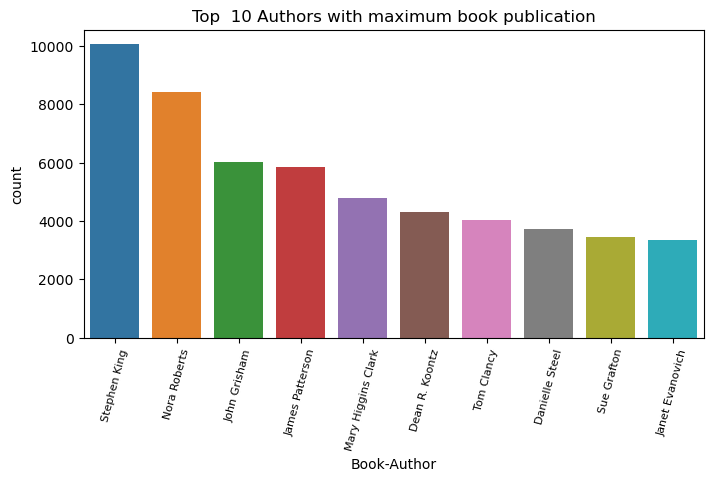

In [40]:
# To check for author who has written maximum books
plt.figure(figsize=(8,4))
sns.countplot(x= "Book-Author", data = dataset,
              order = dataset["Book-Author"].value_counts().iloc[:10].index)
plt.title("Top  10 Authors with maximum book publication")
plt.xticks(rotation=75,fontsize = 8)
plt.show()

Stephen King is the author who has written maxinum books

In [41]:
#to find most occuring book in our data
book = dataset["Book-Title"].value_counts()[:10]
book

Wild Animus                                        2502
The Lovely Bones: A Novel                          1295
The Da Vinci Code                                   899
A Painted House                                     838
The Nanny Diaries: A Novel                          828
Bridget Jones's Diary                               818
The Secret Life of Bees                             781
Divine Secrets of the Ya-Ya Sisterhood: A Novel     740
The Red Tent (Bestselling Backlist)                 723
Angels &amp; Demons                                 670
Name: Book-Title, dtype: int64

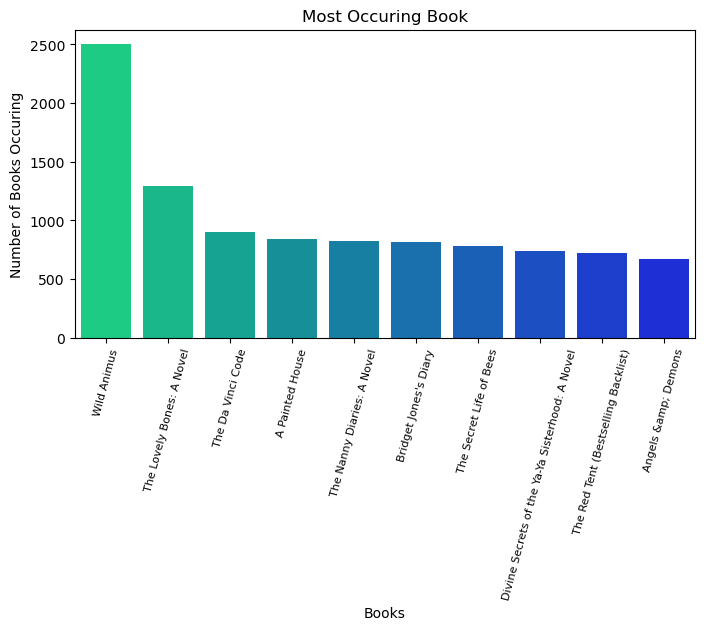

In [42]:
#To check for most occuring book
plt.figure(figsize = (8,4))
sns.barplot(x = book.index, y = book,
            palette = "winter_r")
plt.title("Most Occuring Book")
plt.ylabel("Number of Books Occuring")
plt.xticks(rotation=75, fontsize = 8)
plt.xlabel("Books")
plt.show()

Wild animus is the most occuring book in the dataset

In [43]:
## To check for top publications
publishers= dataset["Publisher"].value_counts()[:10]
publishers

Ballantine Books            34730
Pocket                      31991
Berkley Publishing Group    28616
Warner Books                25509
Harlequin                   25027
Bantam Books                23600
Bantam                      20008
Signet Book                 19158
Avon                        17354
Penguin Books               17170
Name: Publisher, dtype: int64

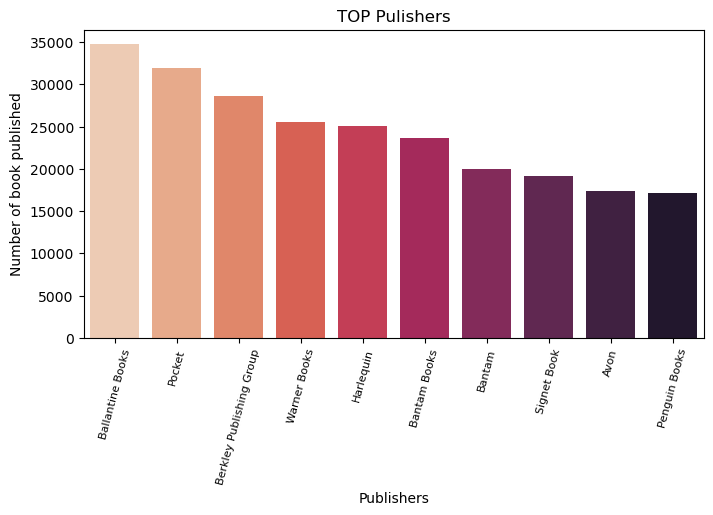

In [44]:
plt.figure(figsize=(8,4))
sns.barplot(x= publishers.index,y= publishers, palette = "rocket_r")
plt.title("TOP Pulishers")
plt.ylabel("Number of book published")
plt.xlabel("Publishers")
plt.xticks(rotation = 75, fontsize = 8)
plt.show()

Ballantine Books has published maximum books 

In [45]:
#check for at which year how many books were published
year = dataset.groupby(['Year-Of-Publication'])['Book-Title'].agg('count').sort_values(ascending = False)
year.head(10)

Year-Of-Publication
2002    105899
2001     79813
1999     75217
2003     72553
2000     72359
1998     64225
1997     59374
1996     58854
1995     54113
1994     46454
Name: Book-Title, dtype: int64

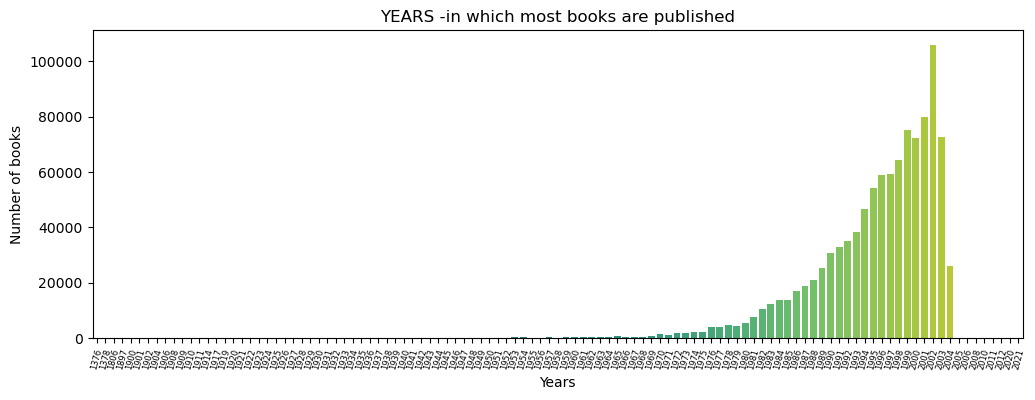

In [46]:
plt.figure(figsize=(12,4))
sns.barplot(x=year.index, y=year, palette = "viridis")
plt.title("YEARS -in which most books are published")
plt.xlabel("Years")
plt.ylabel("Number of books")
plt.xticks(rotation = 75,fontsize=6)
plt.show()

In year 2002 maximum books were published


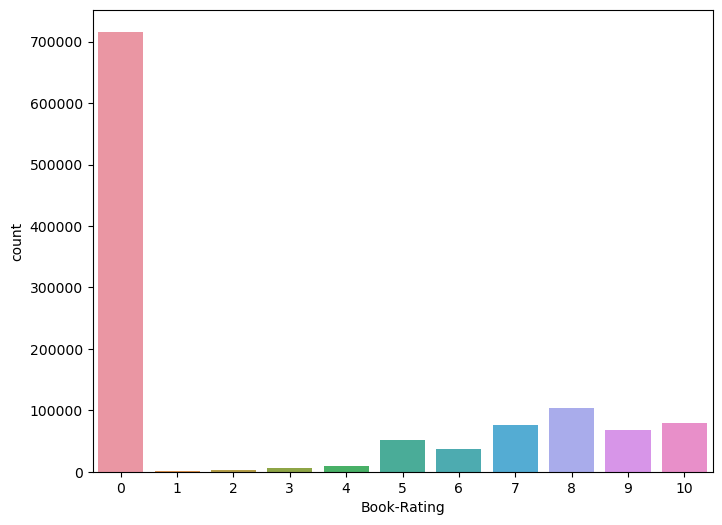

In [47]:
## countplot to check for book ratings
plt.figure(figsize=(8,6))
sns.countplot(x="Book-Rating", data=ratings)
plt.show()

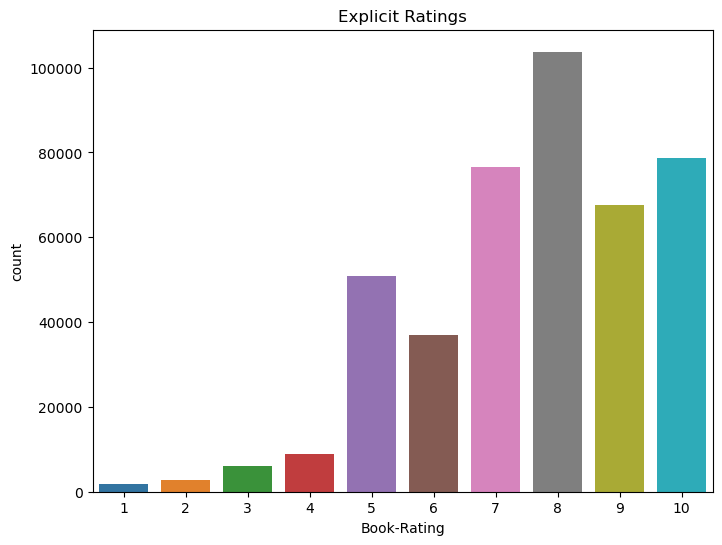

In [48]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['Book-Rating'] != 0]
sns.countplot(x="Book-Rating", data=data)
plt.title("Explicit Ratings")
plt.show()

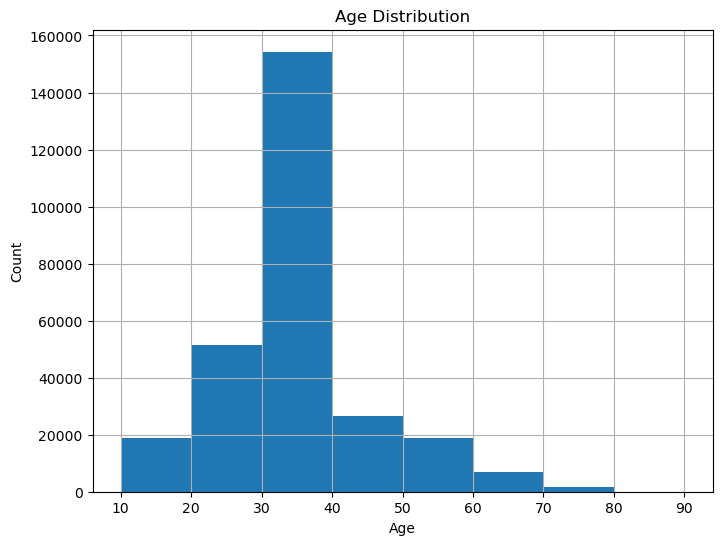

In [49]:
# Histogram to check age distribution of users
plt.figure(figsize=(8,6))
users.Age.hist(bins=[10*i for i in range(1, 10)])     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

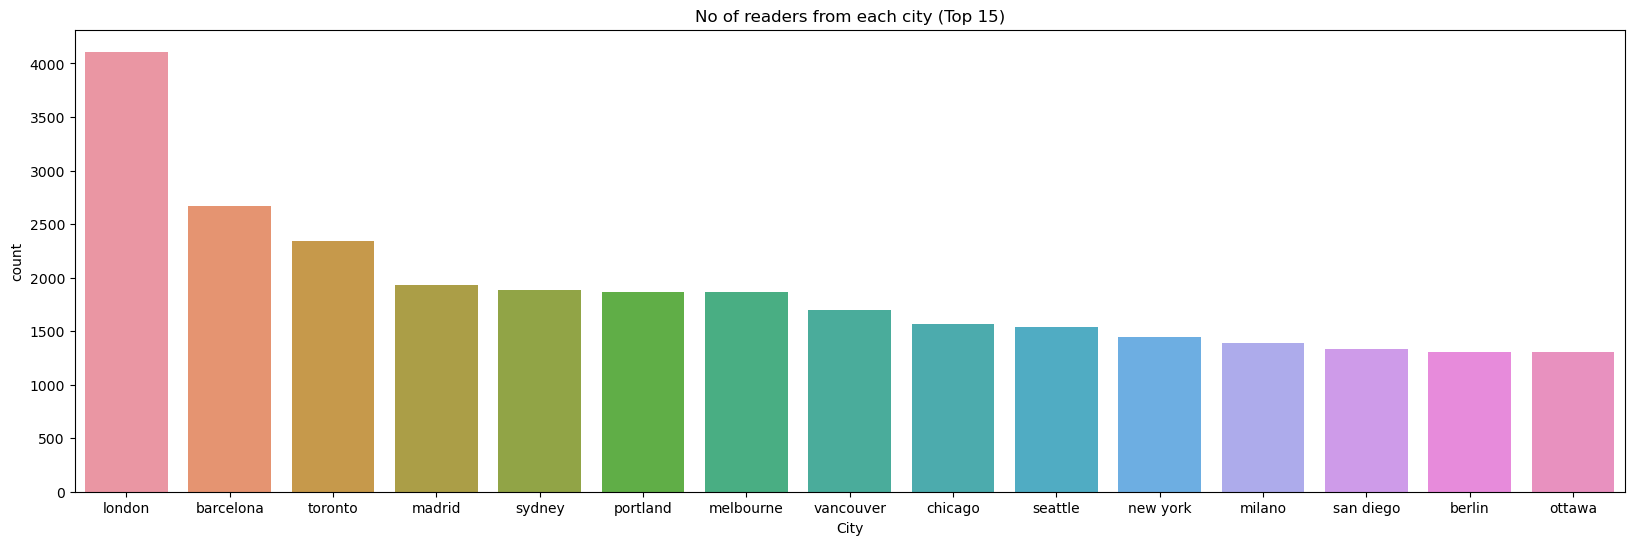

In [50]:
##countplot for the no. of readers from each city
plt.figure(figsize=(20,6))
sns.countplot(x="City", data=users,order=users['City'].value_counts().index[0:15])
plt.title("No of readers from each city (Top 15)")
plt.show()

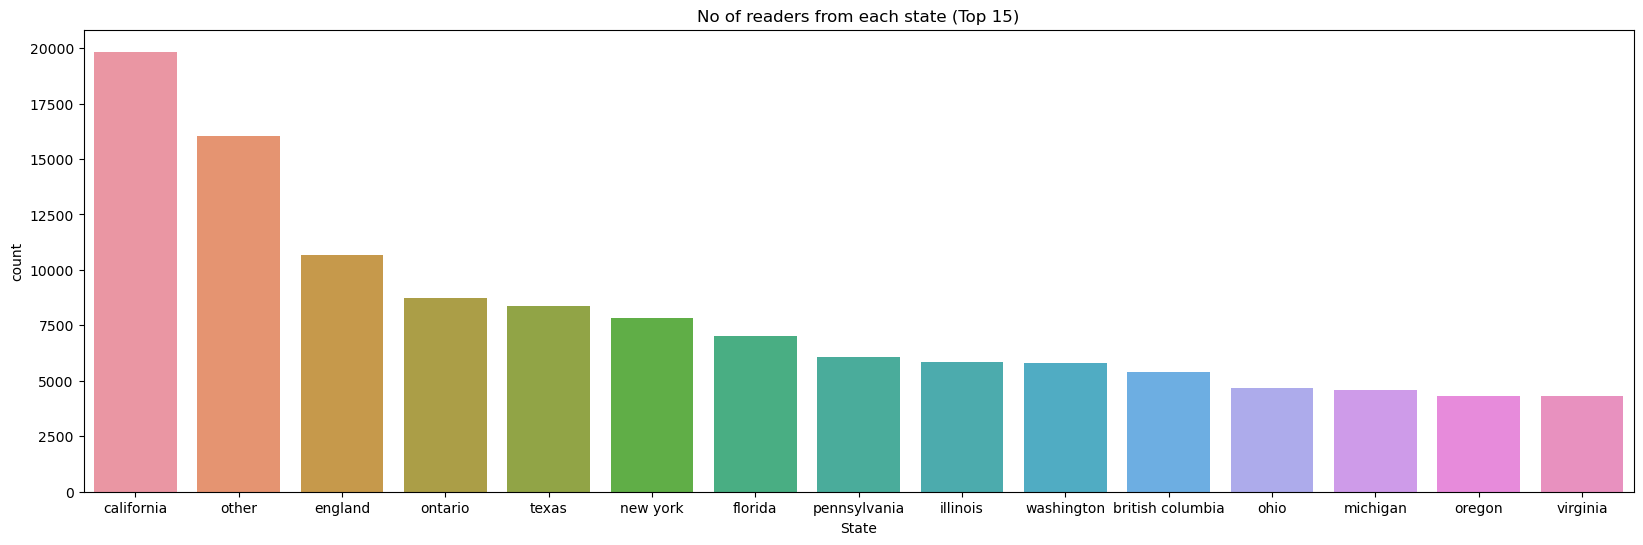

In [51]:
##countplot for no.of raders from each state
plt.figure(figsize=(20,6))
sns.countplot(x="State", data=users,order=users['State'].value_counts().index[0:15])
plt.title("No of readers from each state (Top 15)")
plt.show()

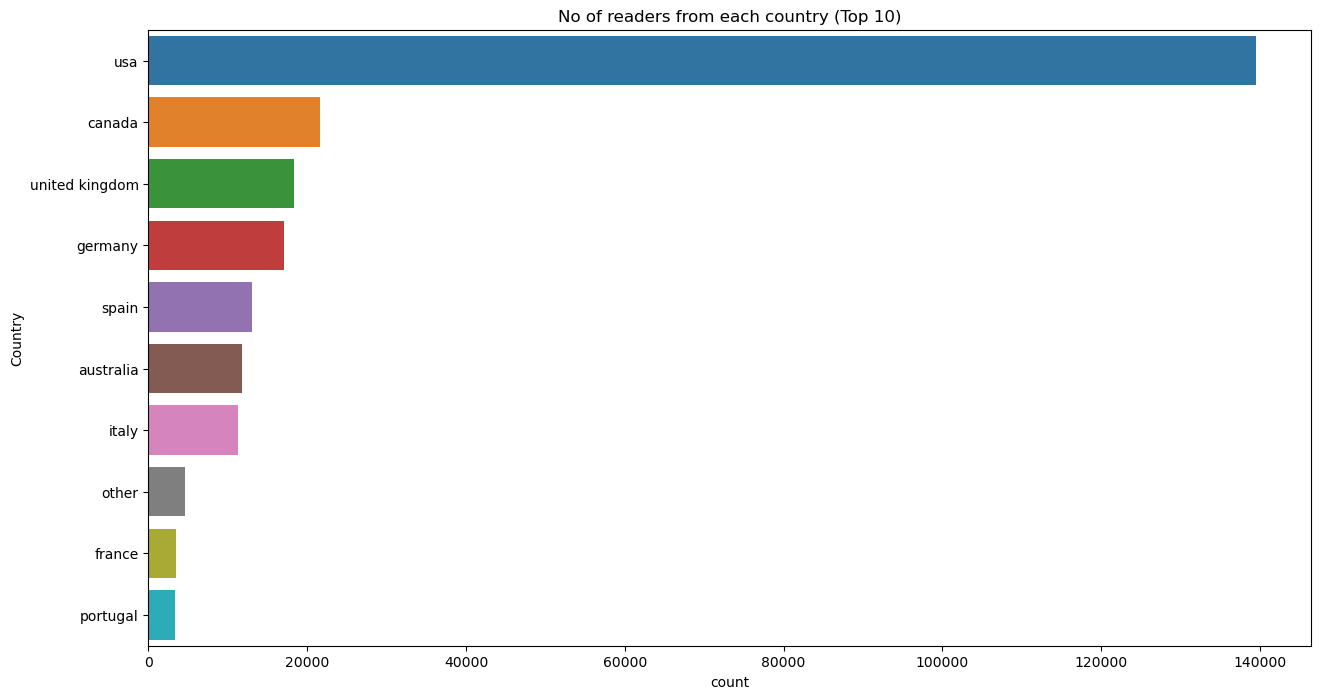

In [52]:
## NO. of readers from each country
plt.figure(figsize=(15,8))
sns.countplot(y="Country", data=users, order=users['Country'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")
plt.show()

#Popularity Based Recommendation system

In [53]:
dataset1 = dataset.copy()
num_rating_df = dataset1.groupby("Book-Title").count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={"Book-Rating":"Total-Ratings"},inplace=True)
num_rating_df

,Book-Title,Total-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241068,Ã?Â?lpiraten.,2
241069,Ã?Â?rger mit Produkt X. Roman.,4
241070,Ã?Â?sterlich leben.,1
241071,Ã?Â?stlich der Berge.,3


In [54]:
average_rating_df = dataset1.groupby("Book-Title").mean()["Book-Rating"].reset_index()
average_rating_df.rename(columns={"Book-Rating":"Average-Ratings"},inplace=True)
average_rating_df

,Book-Title,Average-Ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241068,Ã?Â?lpiraten.,0.000000
241069,Ã?Â?rger mit Produkt X. Roman.,5.250000
241070,Ã?Â?sterlich leben.,7.000000
241071,Ã?Â?stlich der Berge.,2.666667


In [55]:
final_df = num_rating_df.merge(average_rating_df,on='Book-Title')
final_df

,Book-Title,Total-Ratings,Average-Ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241068,Ã?Â?lpiraten.,2,0.000000
241069,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241070,Ã?Â?sterlich leben.,1,7.000000
241071,Ã?Â?stlich der Berge.,3,2.666667


In [56]:
#To extract the books having maximum rating(Total-Ratings>300)
final_df= final_df[final_df['Total-Ratings']>=300].sort_values('Average-Ratings',ascending=False)
final_df

,Book-Title,Total-Ratings,Average-Ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
187379,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
...,...,...,...
233515,While I Was Gone,431,2.580046
201927,The Perfect Storm : A True Story of Men Agains...,404,2.539604
4808,A Map of the World,327,2.492355
52409,Disclosure,318,2.345912


These are the top 10 most popular books from given dataset


In [57]:
final_df = final_df.merge(dataset1,on="Book-Title")
final_df.head(10)

,Book-Title,Total-Ratings,Average-Ratings,ISBN,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
0,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,11676,0,35,other,other,other
1,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,11676,9,35,other,other,other
2,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0786222743,J. K. Rowling,2000,Thorndike Press,11676,6,35,other,other,other
3,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,96054,0,29,ottawa,ontario,canada
4,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,29526,10,26,knoxville,tennessee,usa
5,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,274634,9,33,wahiawa,hawaii,usa
6,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,7346,0,49,sunnyvale,california,usa
7,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136369,J. K. Rowling,2001,Scholastic,9856,10,22,glendale,colorado,usa
8,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,36606,0,39,san marcos,california,usa
9,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804,0439136350,J. K. Rowling,1999,Scholastic,55492,10,43,antioch,illinois,usa


## Collaborative Filtering Based Recommender System(usesr-item)

In [58]:
dataset1.groupby("User-ID").count()['Book-Rating']# to check how many books rated by singel user

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Rating, Length: 92185, dtype: int64

In [59]:
x = dataset1.groupby("User-ID").count()['Book-Rating']>200 # get only those users who have rated more than 200 books
readers = x[x].index                                             

In [60]:
filtered_ratings = dataset1[dataset1['User-ID'].isin(readers)]

In [61]:
filtered_ratings.shape

(474047, 11)

In [62]:
y = filtered_ratings.groupby("Book-Title").count()["Book-Rating"]>=50 # to get only those books which has been rated more than 50 times
y[y]      

Book-Title
1984                                                                 True
1st to Die: A Novel                                                  True
2nd Chance                                                           True
4 Blondes                                                            True
A Bend in the Road                                                   True
                                                                     ... 
Year of Wonders                                                      True
You Belong To Me                                                     True
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values    True
Zoya                                                                 True
\O\" Is for Outlaw"                                                  True
Name: Book-Rating, Length: 706, dtype: bool

In [63]:
famous_books = y[y].index

In [64]:
final_ratings = filtered_ratings[filtered_ratings["Book-Title"].isin(famous_books)]#get only those books which are present in famous books

In [65]:
final_ratings.shape

(58590, 11)

In [66]:
final_ratings.drop_duplicates()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Age,City,State,Country
82,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,11676,9,35,other,other,other
85,0440234743,The Testament,John Grisham,1999,Dell,11676,9,35,other,other,other
86,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,11676,8,35,other,other,other
89,0971880107,Wild Animus,Rich Shapero,2004,Too Far,11676,6,35,other,other,other
90,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,11676,0,35,other,other,other
...,...,...,...,...,...,...,...,...,...,...,...
822454,0670894184,Back Roads,Tawni O'Dell,2000,Viking Books,165232,5,23,saint albans,west virginia,usa
822459,0670858692,Rose Madder,Stephen King,1995,Viking Books,165232,0,23,saint albans,west virginia,usa
897118,1551668874,Heartbreaker,Linda Howard,2002,Mira,72352,0,49,samieira,pontevedra,spain
897155,0671670069,Guardian Angel,Julie Garwood,1990,Pocket,72352,10,49,samieira,pontevedra,spain


In [67]:
pivot_table = final_ratings.pivot_table(index = "Book-Title", columns = "User-ID",values = "Book-Rating")

In [68]:
pivot_table.fillna(0,inplace = True)

In [69]:
pivot_table

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now we have 810 users and 706 books

Each book has become a vector in 810 dimensions

In [70]:
cosine_similarity(pivot_table) # to find out the similarities between these vectors

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

We are finding the similarity between each book with the remaining books

In [71]:
similarity_score =cosine_similarity(pivot_table)

In [72]:
similarity_score.shape # similarity of 

(706, 706)

In [73]:
def recommend(book_name):
  index = np.where(pivot_table.index == book_name)[0][0] # index fetch
  similar_items = sorted(list(enumerate(similarity_score[index])), key = lambda x:x[1], reverse=True)[1:6]   
  # to get similar top 5 similar books, index form 1 because at 0th index the book itself present

  for i in similar_items:
    print(pivot_table.index[i[0]])

In [74]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [75]:
recommend('Message in a Bottle')

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


In [76]:
recommend('The Notebook')

A Walk to Remember
The Rescue
One Door Away from Heaven
Toxin
The Five People You Meet in Heaven


In [77]:
recommend("The Da Vinci Code")

Angels &amp; Demons
Touching Evil
Saving Faith
The Sweet Potato Queens' Book of Love
Middlesex: A Novel


In [78]:
recommend("Harry Potter and the Chamber of Secrets (Book 2)")

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Order of the Phoenix (Book 5)


# Collaborative Filtering based Recommendation System--(User-Item based)

In [79]:
ratings_new = ratings[ratings.ISBN.isin(books.ISBN)] 
ratings.shape,ratings_new.shape

((1149776, 3), (1031472, 3))

In [80]:
print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031472, 3)
shape of dataset after dropping (1031472, 3)


In [81]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

In [82]:
# Create column Rating average 
ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')
# Create column Rating sum
ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')

In [83]:
ratings_explicit.head()
ratings_explicit.rename(columns={'user_id':'User-ID','isbn':'ISBN','book_rating':'Book-Rating'},inplace=True)

In [84]:
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


In [85]:
users_interactions_count_df = ratings_explicit.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 5 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68154
# of users with at least 5 interactions: 449


In [86]:
print('# of interactions: %d' % len(ratings_explicit))
interactions_from_selected_users_df = ratings_explicit.merge(users_with_enough_interactions_df, 
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 384024
# of interactions from users with at least 5 interactions: 103287


In [87]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000000,1
1,2033,0060248025,10,8.766667,30
2,2033,0060256664,10,8.333333,6
3,2033,0060256737,10,9.045455,22
4,2033,0060950536,10,9.400000,5
5,2033,0061020419,7,7.000000,1
6,2033,0061020427,6,6.000000,1
7,2033,0061056278,10,9.000000,2
8,2033,0061056286,8,7.666667,3
9,2033,0061056294,9,7.000000,2


In [88]:
import math

In [89]:
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.head()

# of unique user/item interactions: 103287


,ISBN,User-ID,Book-Rating
0,0000913154,171118,3.169925
1,0001046438,23902,3.321928
2,000104687X,23902,2.807355
3,0001047213,23902,3.321928
4,0001047973,23902,3.321928


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(interactions_train_df))
print('# interactions on Test set: %d' % len(interactions_test_df))

# interactions on Train set: 82629
# interactions on Test set: 20658


In [92]:
interactions_test_df.head()

,ISBN,User-ID,Book-Rating
63953,0671027573,11676,3.169925
17913,0345335708,257204,3.459432
1777,0060268638,189835,2.584963
43216,0446350354,254899,2.584963
8362,0140440100,149907,3.459432


In [93]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047973,000104799X,0001048082,0001053736,0001055607,0001056107,0001845039,0001935968,...,B00007FYKW,B00008RWPV,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [96]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [97]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [98]:
users_items_pivot_matrix.shape

(449, 55712)

In [99]:
U.shape

(449, 15)

In [100]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [101]:
Vt.shape

(15, 55712)

In [102]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 1.05618839e-02,  2.71741307e-03,  3.21550038e-03, ...,
         1.54863736e-04,  4.08913021e-04,  7.85652408e-03],
       [-8.35677612e-04, -8.25370877e-04, -9.76656954e-04, ...,
         8.96609400e-05,  1.80734203e-04,  4.34043488e-03],
       [ 4.01560645e-03, -1.68170208e-03, -1.98994910e-03, ...,
         1.44966292e-04,  3.19295736e-04,  6.03189708e-03],
       ...,
       [ 4.26535665e-03,  1.87793658e-03,  2.22215233e-03, ...,
         2.52311254e-04,  4.61707467e-04,  7.93469622e-03],
       [ 1.13782179e-02, -2.14589185e-03, -2.53922237e-03, ...,
         3.31964612e-04,  6.33459700e-04,  1.16510173e-02],
       [-1.44355936e-03,  5.18020831e-03,  6.12971285e-03, ...,
         8.59709299e-05,  1.44031794e-04,  2.97993792e-03]])

In [103]:
all_user_predicted_ratings.shape

(449, 55712)

In [104]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.010562,-0.000836,0.004016,0.002609,-0.002036,-0.004432,-0.002510,-0.001518,0.012379,0.012486,...,0.000391,0.003079,-0.001926,0.007376,-0.012176,0.001314,0.007146,0.004265,0.011378,-0.001444
000104687X,0.002717,-0.000825,-0.001682,0.017330,-0.000643,0.007943,0.016975,0.007483,-0.002589,0.011805,...,-0.002382,0.013477,-0.001236,0.020387,-0.004833,-0.006119,0.015382,0.001878,-0.002146,0.005180
0001047973,0.003216,-0.000977,-0.001990,0.020507,-0.000761,0.009399,0.020087,0.008855,-0.003063,0.013968,...,-0.002819,0.015948,-0.001462,0.024124,-0.005719,-0.007240,0.018201,0.002222,-0.002539,0.006130
000104799X,0.000654,0.000375,0.000687,0.001744,0.000207,0.001347,0.001326,0.002475,0.001599,0.004229,...,0.001285,0.002078,0.002568,0.001016,0.001540,0.002197,0.002041,0.000880,0.001322,0.000302
0001048082,0.003068,-0.000932,-0.001899,0.019568,-0.000726,0.008969,0.019168,0.008450,-0.002923,0.013329,...,-0.002690,0.015218,-0.001396,0.023021,-0.005457,-0.006909,0.017369,0.002120,-0.002423,0.005849


In [105]:
len(cf_preds_df.columns)

449

In [106]:
global books
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [107]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [108]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [109]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [110]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_explicit['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
        
        person_metrics = self.evaluate_model_for_user(model, userid)  
        return

model_recommender = ModelRecommender()    

In [111]:
print(list(interactions_full_indexed_df.index.values))

[171118, 23902, 23902, 23902, 23902, 166596, 23902, 109901, 189835, 189835, 85526, 93047, 95359, 56399, 229329, 11676, 69078, 63714, 101606, 11676, 36907, 85526, 26583, 120565, 101606, 11676, 193560, 262998, 23902, 63714, 11676, 159506, 189835, 11676, 180651, 63714, 193560, 274301, 120565, 30511, 189334, 189334, 275970, 166596, 23902, 6242, 101606, 101851, 11676, 95010, 11676, 37712, 123883, 94853, 23902, 23902, 11676, 189334, 11676, 11676, 149908, 30511, 94853, 225087, 172742, 120565, 16634, 88733, 218552, 264321, 189334, 56271, 11676, 63714, 6543, 30511, 134434, 76626, 240543, 26583, 248718, 76626, 56399, 270713, 168245, 168245, 98758, 23902, 63714, 107784, 37644, 37644, 168245, 164096, 35859, 177458, 136010, 197659, 23902, 11676, 11676, 23902, 78973, 200226, 30810, 11676, 242006, 225087, 11676, 274301, 11676, 30511, 193560, 189835, 39281, 120565, 11676, 183958, 11676, 148199, 23902, 109955, 76626, 193560, 148258, 11676, 63714, 85526, 109955, 23902, 225232, 148258, 189334, 105517, 62

In [114]:
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  11676
Recommendation for User-ID =  11676
         ISBN                                         Book-Title  recStrength
0  0385504209                                  The Da Vinci Code     0.095687
1  0312980140                  Seven Up (A Stephanie Plum Novel)     0.093427
2  0452282152                          Girl with a Pearl Earring     0.092080
3  014028009X                              Bridget Jones's Diary     0.088789
4  1400034779  The No. 1 Ladies' Detective Agency (Today Show...     0.075010
5  0553250531                               The Valley of Horses     0.072621
6  0805063897   Nickel and Dimed: On (Not) Getting By in America     0.072481
7  0060928336    Divine Secrets of the Ya-Ya Sisterhood: A Novel     0.069352
8  0446606812                                Message in a Bottle     0.068558
9  0440212561                                          Outlander     0.065734
